In [ ]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
#import zipline

In [ ]:
!pip install keras==2.3.1
!pip install tensorflow==2.1.0
!pip install keras_applications==1.0.8
!pip install image-classifiers==1.0.0
!pip install efficientnet==1.0.0

     |████████████████████████████████| 378kB 4.3MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 3.9MB 32.2MB/s 
     |████████████████████████████████| 450kB 40.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=050408ec4bd460c0f7036a8b6788e6fd27d019d7b3583cccbedee5a14a6f484c
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Found existing installation: 

  Found existing installation: efficientnet 1.1.1
    Uninstalling efficientnet-1.1.1:
      Successfully uninstalled efficientnet-1.1.1


In [ ]:
!pip install tensorflow-estimator==2.1.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [75,75]
train_path = '/content/drive/MyDrive/Train.zip (Unzipped Files)/Train'
valid_path = '/content/drive/MyDrive/Test' 

In [ ]:
!pip install --upgrade pip
!pip install tensorflow==2.0.0-alpha0
!pip install keras
!pip install numpy==1.16.2

     |████████████████████████████████| 1.6MB 4.3MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 80.3 MB 17 kB/s 
     |████████████████████████████████| 411 kB 43.3 MB/s 
     |████████████████████████████████| 3.0 MB 38.8 MB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensorflow 2.0.0a0 which is incompatible.


     |████████████████████████████████| 17.3 MB 39.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires numpy>=1.17, but you have numpy 1.16.2 which is incompatible.
tensorflow-probability 0.12.1 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
pyerfa 2.0.0 requires numpy>=1.17, but you have numpy 1.16.2 which is incompatible.
pyarrow 3.0.0 requires numpy>=1.16.6, but you have numpy 1.16.2 which is incompatible.
kapre 0.3.5 requires numpy>=1.18.5, but you have numpy 1.16.2 which is incompatible.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensorflow 2.0.0a0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is in

In [ ]:
import efficientnet.keras as efn
base_model = efn.EfficientNetB0(input_shape = (32,32,3), include_top = False, weights = 'imagenet')
#!pip install --upgrade tensorflow==2.0.0

Using TensorFlow backend.


AttributeError: ignored

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_tensor=Input(shape=(75,75,3)), weights = 'imagenet', include_top =False)

NameError: ignored

In [ ]:
# don't train existing weights
for layer in base_model.layers:
    layer.trainable = False

NameError: ignored

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Train.zip (Unzipped Files)/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(base_model.output)

In [ ]:
#import tensorflow as tf
#from tf.keras.layers import Dense, Softmax, Dropout
from tensorflow.python.framework.ops import disable_eager_execution
from tensorflow.keras.layers import Dropout
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=base_model.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 37, 37, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 37, 37, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 37, 37, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
import tensorflow as tf
import os
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Train.zip (Unzipped Files)/Train',
                                                 target_size = (75,75),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

Found 3114 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Test',
                                            target_size = (75,75),
                                            batch_size = 20,
                                            class_mode = 'categorical')

Found 132 images belonging to 2 classes.


In [ ]:
inc_history = model.fit_generator(training_set, validation_data = test_set, steps_per_epoch = 10, epochs =20,validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
10/10 [==============================] - 238s 21s/step - loss: 0.7067 - accuracy: 0.6000 - val_loss: 0.5325 - val_accuracy: 0.7273
Epoch 2/20
10/10 [==============================] - 129s 13s/step - loss: 0.4789 - accuracy: 0.7600 - val_loss: 0.4160 - val_accuracy: 0.8258
Epoch 3/20
10/10 [==============================] - 108s 11s/step - loss: 0.4045 - accuracy: 0.8400 - val_loss: 0.3595 - val_accuracy: 0.8712
Epoch 4/20
10/10 [==============================] - 114s 12s/step - loss: 0.2977 - accuracy: 0.8800 - val_loss: 0.3121 - val_accuracy: 0.8864
Epoch 5/20
10/10 [==============================] - 101s 10s/step - loss: 0.3005 - accuracy: 0.8950 - val_loss: 0.2756 - val_accuracy: 0.9015
Epoch 6/20
10/10 [==============================] - 99s 10s/step - loss: 0.2721 - accuracy: 0.8800 - val_loss: 0.2777 - val_accuracy: 0.8939
Epoch 7/20
10/10 [==============================] - 83s 8s/step - loss: 0.2923 - accuracy: 0.8700 - val_loss: 0.2455 - val_accuracy: 0.8939
Epoch 8/2

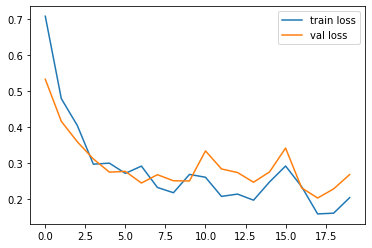

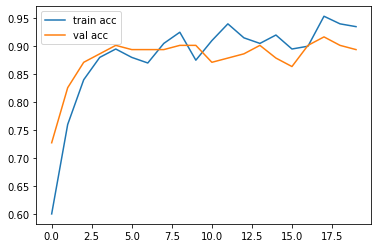

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(inc_history.history['loss'], label='train loss')
plt.plot(inc_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(inc_history.history['accuracy'], label='train acc')
plt.plot(inc_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
pwd

In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('model_inception.h5')
tf.saved_model.save(new_model, "new")
print("successfully saved keras model file to tensorflow model file")
# Show the model architecture
new_model.summary()


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: new/assets
successfully saved keras model file to tensorflow model file
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 37, 37, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 37, 37, 32)   96     

In [ ]:
#Converting saved_model to tensorflowlite model
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('/content/new') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('Inception_model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
#y_pred = model.predict(test_set)
#y_pred
#y_pred
pred=[]
for i in range(len(y_pred)):
  if (y_pred[i][0]<0.5) and (y_pred[i][1]>0.5):
    pred.append(1)
  elif (y_pred[i][0]>0.5) and (y_pred[i][1]<0.5):
    pred.append(0)
  else:
    continue

In [ ]:
len(test_set.classes)

132

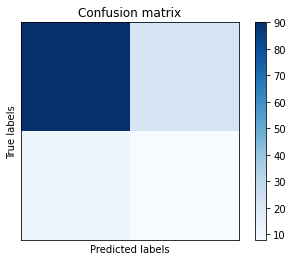

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
cm = metrics.confusion_matrix(test_set.classes,pred)
# or
#cm = np.array([[1401,    0],[1112, 0]])
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([],[])
plt.yticks([],[])
plt.title('Confusion matrix')
plt.colorbar()
plt.show()

In [ ]:
print('Confusion Matrix')
cm = metrics.confusion_matrix(test_set.classes, pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(test_set.classes,pred))

Confusion Matrix
[[90 22]
 [12  8]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       112
           1       0.27      0.40      0.32        20

    accuracy                           0.74       132
   macro avg       0.57      0.60      0.58       132
weighted avg       0.79      0.74      0.76       132



CONFUSION MATRIX